## TASK 3 : SPAM EMAIL DETECTION

### Algorithm: Logistic Regression,random forest classifier, adaboosting classifier, knn
### Description: Create a model to classify emails as spam or not spam based on their content.

#### Importing necessary libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Step 1: Read the data

In [40]:
data = pd.read_csv("C:/Users/HP/Downloads/spam_data.csv")

#### Step 2: Data analysis and preprocessing

#### Display the number of rows and columns

In [41]:
print("Number of rows:", data.shape[0])

Number of rows: 5572


In [42]:
print("Number of columns:", data.shape[1])

Number of columns: 2


#### Check for duplicate rows

In [43]:
duplicate_rows = data[data.duplicated()]

#### Display duplicate rows

In [44]:
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     Category                                            Message
103       ham  As per your request 'Melle Melle (Oru Minnamin...
154       ham  As per your request 'Melle Melle (Oru Minnamin...
207       ham  As I entered my cabin my PA said, '' Happy B'd...
223       ham                             Sorry, I'll call later
326       ham                   No calls..messages..missed calls
...       ...                                                ...
5524     spam  You are awarded a SiPix Digital Camera! call 0...
5535      ham  I know you are thinkin malaria. But relax, chi...
5539      ham                         Just sleeping..and surfing
5553      ham                        Hahaha..use your brain dear
5558      ham                             Sorry, I'll call later

[415 rows x 2 columns]


#### Count the number of duplicate rows

In [45]:
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 415


#### Remove duplicate rows

In [46]:
data = data.drop_duplicates()

#### Confirm removal of duplicates

In [47]:
print("Number of rows after removing duplicates:", data.shape[0])

Number of rows after removing duplicates: 5157


In [48]:
print("Data Analysis:")

Data Analysis:


In [49]:
print(data.head())  # View the first few rows of data

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [50]:
print(data.info())  # Get data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB
None


#### Check for missing values

In [51]:
print("Missing Values:")

Missing Values:


In [52]:
print(data.isnull().sum())

Category    0
Message     0
dtype: int64


#### Calculate percentage of 'ham' and 'spam'

In [53]:
percentage_ham = (data['Category'].value_counts(normalize=True) * 100)['ham']
percentage_spam = (data['Category'].value_counts(normalize=True) * 100)['spam']

#### Display percentages

In [54]:
print("Percentage of 'ham' messages:", percentage_ham)
print("Percentage of 'spam' messages:", percentage_spam)

Percentage of 'ham' messages: 87.5702928058949
Percentage of 'spam' messages: 12.429707194105099


#### Visualize class distribution

#### Plotting pie chart

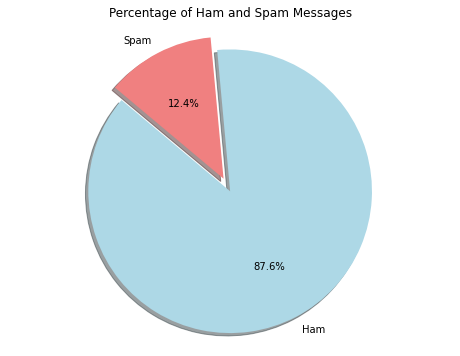

In [55]:
labels = ['Ham', 'Spam']
sizes = [percentage_ham, percentage_spam]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)  # explode the 2nd slice (i.e. 'Spam')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Ham and Spam Messages')
plt.show()

#### Word Cloud for Spam Messages

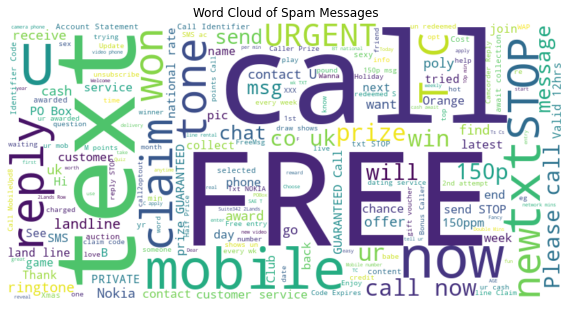

In [58]:
from wordcloud import WordCloud

# Filter spam messages
spam_messages = data[data['Category'] == 'spam']['Message']

# Join all spam messages into a single string
spam_text = ' '.join(spam_messages)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Spam Messages')
plt.axis('off')
plt.show()

#### Word Cloud for Not Spam Messages

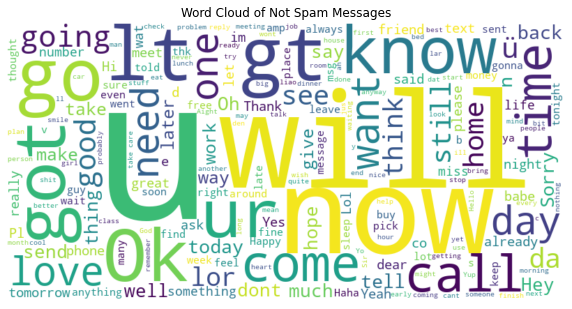

In [59]:
# Filter not spam (ham) messages
not_spam_messages = data[data['Category'] == 'ham']['Message']

# Join all not spam messages into a single string
not_spam_text = ' '.join(not_spam_messages)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_spam_text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Not Spam Messages')
plt.axis('off')
plt.show()

#### Finding top 30 words of spam messages

In [61]:
from collections import Counter

# Tokenize spam messages
spam_messages = data[data['Category'] == 'spam']['Message']
spam_words = ' '.join(spam_messages).split()

# Count occurrences of each word
spam_word_counts = Counter(spam_words)

# Get the top thirty words
top_thirty_spam_words = spam_word_counts.most_common(30)

# Print the top thirty words
print("Top Thirty Words in Spam Messages:")
for word, count in top_thirty_spam_words:
    print(f"{word}: {count}")

Top Thirty Words in Spam Messages:
to: 510
a: 308
your: 167
call: 157
the: 157
or: 154
2: 150
for: 150
you: 145
is: 125
Call: 114
on: 112
have: 107
from: 107
and: 102
&: 88
ur: 86
with: 85
of: 78
4: 74
FREE: 73
mobile: 68
You: 65
are: 65
our: 64
Your: 64
To: 63
claim: 62
text: 61
U: 58


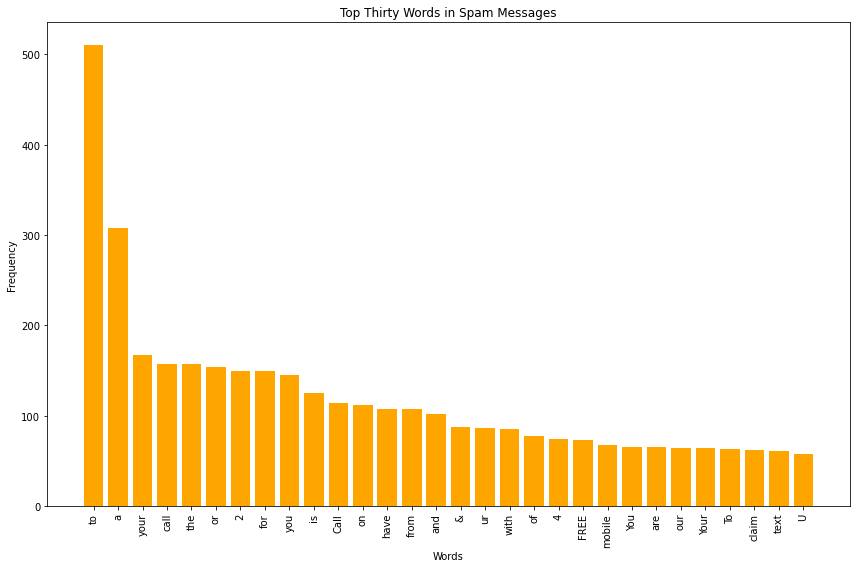

In [62]:
# Tokenize spam messages
spam_messages = data[data['Category'] == 'spam']['Message']
spam_words = ' '.join(spam_messages).split()

# Count occurrences of each word
spam_word_counts = Counter(spam_words)

# Get the top thirty words
top_thirty_spam_words = spam_word_counts.most_common(30)

# Extract words and their counts
words, counts = zip(*top_thirty_spam_words)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(range(len(words)), counts, tick_label=words, color='orange')
plt.title('Top Thirty Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Finding top 30 words of not spam messages

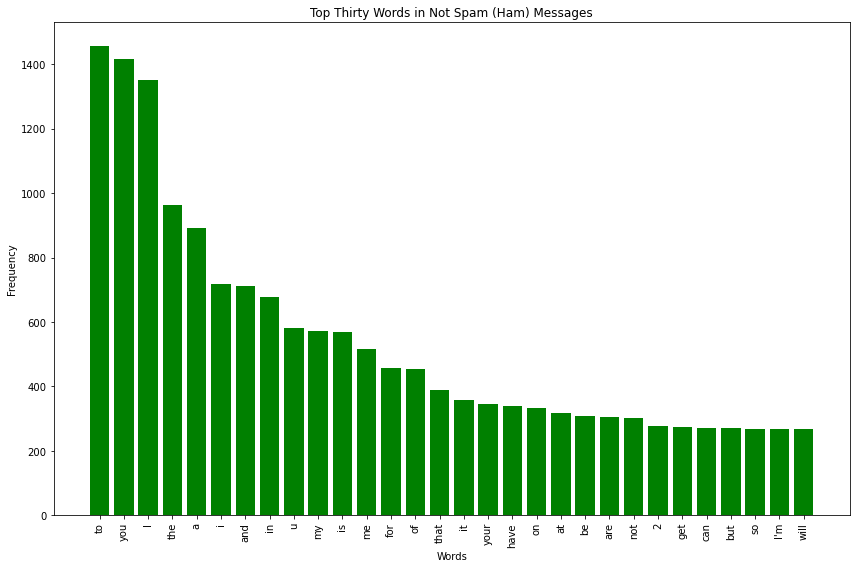

In [64]:
# Tokenize not spam (ham) messages
not_spam_messages = data[data['Category'] == 'ham']['Message']
not_spam_words = ' '.join(not_spam_messages).split()

# Count occurrences of each word
not_spam_word_counts = Counter(not_spam_words)

# Get the top thirty words
top_thirty_not_spam_words = not_spam_word_counts.most_common(30)

# Extract words and their counts
words, counts = zip(*top_thirty_not_spam_words)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(range(len(words)), counts, tick_label=words, color='green')
plt.title('Top Thirty Words in Not Spam (Ham) Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Step 3: Preprocessing

#### Convert labels to binary: spam=1, not spam=0

In [14]:
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

#### Step 4: Feature extraction

In [17]:
X = data['Message']
y = data['Category']

#### Step 5: Splitting data into train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6: Model Training and Evaluation

#### Pipeline for Logistic Regression

In [19]:
pipeline_lr = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_lr', LogisticRegression())
])

#### Pipeline for Random Forest Classifier

In [20]:
pipeline_rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_rf', RandomForestClassifier())
])

#### Pipeline for AdaBoost Classifier

In [21]:
pipeline_adaboost = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_adaboost', AdaBoostClassifier())
])

#### Pipeline for K-Nearest Neighbors Classifier

In [22]:
pipeline_knn = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_knn', KNeighborsClassifier())
])

#### List of pipelines

In [23]:
pipelines = [pipeline_lr, pipeline_rf, pipeline_adaboost, pipeline_knn]
pipeline_names = ['Logistic Regression', 'Random Forest', 'AdaBoost', 'KNN']

#### Fit the pipelines

In [24]:
for pipeline, name in zip(pipelines, pipeline_names):
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    # Predictions
    y_pred = pipeline.predict(X_test)
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.9748878923766816
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

Confusion Matrix for Logistic Regression:
[[966   0]
 [ 28 121]]

Training Random Forest...
Random Forest Accuracy: 0.9820627802690582
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix for Random Forest:
[[966

#### Step 7: Visualization of Results

#### Visualizing Confusion Matrix

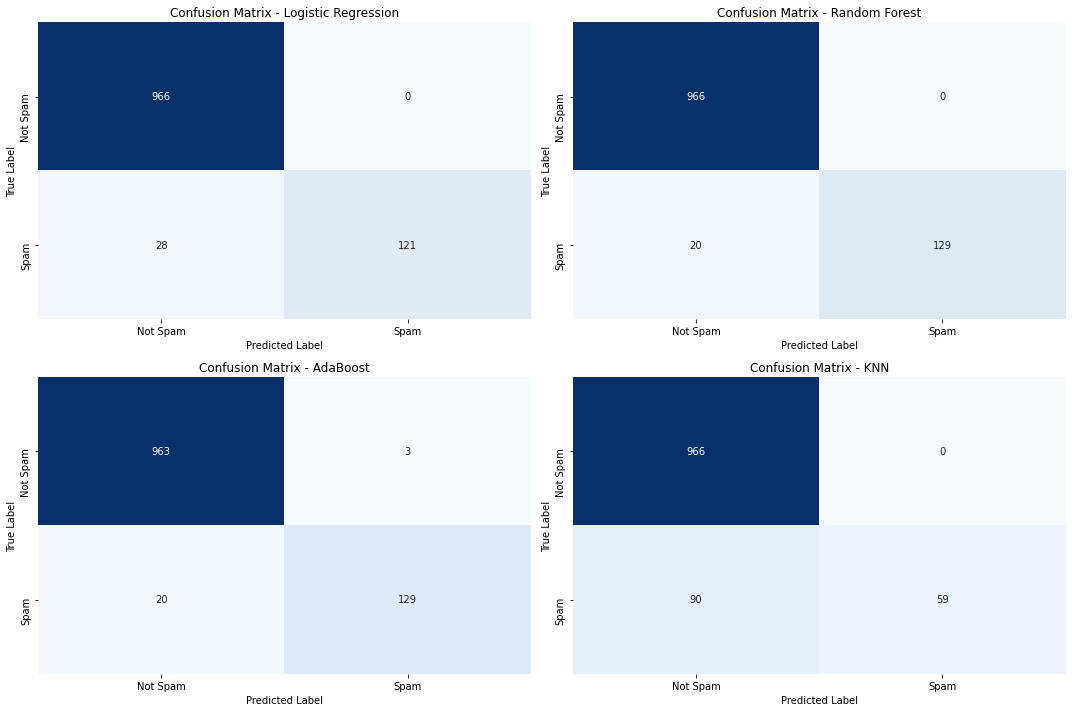

In [25]:
plt.figure(figsize=(15, 10))
for i, pipeline in enumerate(pipelines, 1):
    plt.subplot(2, 2, i)
    sns.heatmap(confusion_matrix(y_test, pipeline.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix - {pipeline_names[i - 1]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()